# 🚀 Qwen Model Benchmarking on GPU (H100, T4, L4)
A hands-on exploration of Qwen LLM variants using Hugging Face Transformers and PyTorch with GPU performance metrics.


## 🧪 Environment Check: Python Setup
Before starting any model benchmarking, it's important to verify the Python environment. This cell prints the path of the current Python executable and the Python version being used.

In [1]:
import sys
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version}")

Python executable: /anaconda/envs/qwen-llm/bin/python
Python version: 3.10.18 (main, Jun  5 2025, 13:14:17) [GCC 11.2.0]


# System Resource Assessment
Start by examining the available resources and verifying our environment setup:

In [2]:
import torch
torch.cuda.device_count()

1

In [3]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='NVIDIA H100 NVL', major=9, minor=0, total_memory=95248MB, multi_processor_count=132, uuid=bd8cf1f6-7f8f-efd8-6a5f-e28967475480, L2_cache_size=60MB)

In [4]:
torch.cuda.get_device_properties(0).name

'NVIDIA H100 NVL'

In [5]:
import psutil
psutil.cpu_count()

40

In [6]:
psutil.virtual_memory().total/(1024**3)

314.692195892334

In [7]:
psutil.virtual_memory().available/(1024**3)

310.837890625

# Comprehensive System Assessment (NVIDIA H100 NVL)
Start by examining the available resources and verifying our environment setup:

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import time
import psutil
import sys
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Verify environment setup
print(f"🐍 Python executable: {sys.executable}")
print(f"🔥 PyTorch version: {torch.__version__}")
print(f"🤖 Transformers version: {__import__('transformers').__version__}")
print(f"📅 Benchmark timestamp: {datetime.now().isoformat()}")
print("=" * 60)

def get_system_info():
    """Comprehensive system resource assessment"""
    info = {
        "cpu_cores": psutil.cpu_count(),
        "total_ram_gb": psutil.virtual_memory().total / (1024**3),
        "available_ram_gb": psutil.virtual_memory().available / (1024**3),
        "timestamp": datetime.now().isoformat()
    }
    
    if torch.cuda.is_available():
        info["cuda_version"] = torch.version.cuda
        info["gpu_count"] = torch.cuda.device_count()
        info["gpus"] = []
        
        for i in range(torch.cuda.device_count()):
            gpu_props = torch.cuda.get_device_properties(i)
            gpu_info = {
                "id": i,
                "name": gpu_props.name,
                "memory_gb": gpu_props.total_memory / (1024**3),
                "compute_capability": f"{gpu_props.major}.{gpu_props.minor}",
                "multiprocessor_count": gpu_props.multi_processor_count
            }
            info["gpus"].append(gpu_info)
            print(f"🎮 GPU {i}: {gpu_props.name}")
            print(f"   💾 Memory: {gpu_props.total_memory / (1024**3):.2f} GB")
            print(f"   🔧 Compute capability: {gpu_props.major}.{gpu_props.minor}")
    else:
        print("❌ CUDA not available - check GPU drivers and PyTorch installation")
        return None
    
    print(f"🖥️  CPU cores: {info['cpu_cores']}")
    print(f"🧠 Total RAM: {info['total_ram_gb']:.2f} GB")
    print(f"💚 Available RAM: {info['available_ram_gb']:.2f} GB")
    
    return info

# Get and store system information
system_info = get_system_info()
if system_info is None:
    print("\n🚨 GPU setup required before continuing. Check environment configuration.")
    exit()

/anaconda/envs/qwen-llm-flash/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🐍 Python executable: /anaconda/envs/qwen-llm-flash/bin/python
🔥 PyTorch version: 2.5.1+cu121
🤖 Transformers version: 4.54.1
📅 Benchmark timestamp: 2025-08-03T07:14:49.801516
🎮 GPU 0: NVIDIA H100 NVL
   💾 Memory: 93.02 GB
   🔧 Compute capability: 9.0
🖥️  CPU cores: 40
🧠 Total RAM: 314.69 GB
💚 Available RAM: 234.37 GB


# Comprehensive System Assessment (Nvidia Tesla T4)
Start by examining the available resources and verifying our environment setup: 

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import time
import psutil
import sys
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Verify environment setup
print(f"🐍 Python executable: {sys.executable}")
print(f"🔥 PyTorch version: {torch.__version__}")
print(f"🤖 Transformers version: {__import__('transformers').__version__}")
print(f"📅 Benchmark timestamp: {datetime.now().isoformat()}")
print("=" * 60)

def get_system_info():
    """Comprehensive system resource assessment"""
    info = {
        "cpu_cores": psutil.cpu_count(),
        "total_ram_gb": psutil.virtual_memory().total / (1024**3),
        "available_ram_gb": psutil.virtual_memory().available / (1024**3),
        "timestamp": datetime.now().isoformat()
    }
    
    if torch.cuda.is_available():
        info["cuda_version"] = torch.version.cuda
        info["gpu_count"] = torch.cuda.device_count()
        info["gpus"] = []
        
        for i in range(torch.cuda.device_count()):
            gpu_props = torch.cuda.get_device_properties(i)
            gpu_info = {
                "id": i,
                "name": gpu_props.name,
                "memory_gb": gpu_props.total_memory / (1024**3),
                "compute_capability": f"{gpu_props.major}.{gpu_props.minor}",
                "multiprocessor_count": gpu_props.multi_processor_count
            }
            info["gpus"].append(gpu_info)
            print(f"🎮 GPU {i}: {gpu_props.name}")
            print(f"   💾 Memory: {gpu_props.total_memory / (1024**3):.2f} GB")
            print(f"   🔧 Compute capability: {gpu_props.major}.{gpu_props.minor}")
    else:
        print("❌ CUDA not available - check GPU drivers and PyTorch installation")
        return None
    
    print(f"🖥️  CPU cores: {info['cpu_cores']}")
    print(f"🧠 Total RAM: {info['total_ram_gb']:.2f} GB")
    print(f"💚 Available RAM: {info['available_ram_gb']:.2f} GB")
    
    return info

# Get and store system information
system_info = get_system_info()
if system_info is None:
    print("\n🚨 GPU setup required before continuing. Check environment configuration.")
    exit()

/anaconda/envs/qwen-llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🐍 Python executable: /anaconda/envs/qwen-llm/bin/python
🔥 PyTorch version: 2.7.1+cu118
🤖 Transformers version: 4.44.0
📅 Benchmark timestamp: 2025-08-02T17:32:55.451092
🎮 GPU 0: Tesla T4
   💾 Memory: 15.57 GB
   🔧 Compute capability: 7.5
🖥️  CPU cores: 8
🧠 Total RAM: 54.92 GB
💚 Available RAM: 53.07 GB


In [9]:
!nvidia-smi

Sat Aug  2 14:55:05 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA H100 NVL                On  | 00000001:00:00.0 Off |                    0 |
| N/A   39C    P0              62W / 400W |      3MiB / 95830MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [1]:
!nvidia-smi

Sat Aug  2 17:32:34 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       On  | 00000001:00:00.0 Off |                  Off |
| N/A   36C    P8              10W /  70W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Troubleshooting Common Issues
If you encounter CUDA-related errors, verify these common issues:

In [10]:
# Common troubleshooting checks
def troubleshoot_setup():
    print("=== Troubleshooting GPU Setup ===")
    
    # Check CUDA installation
    try:
        import torch
        print(f"✅ PyTorch imported successfully")
        print(f"   CUDA compiled version: {torch.version.cuda}")
        print(f"   CUDA runtime version: {torch.cuda.get_device_capability()}")
    except Exception as e:
        print(f"❌ PyTorch import error: {e}")
        return False
    
    # Check GPU accessibility
    if torch.cuda.is_available():
        device = torch.cuda.current_device()
        print(f"✅ GPU accessible: {torch.cuda.get_device_name(device)}")
        
        # Test basic tensor operations
        try:
            test_tensor = torch.randn(1000, 1000).cuda()
            result = torch.mm(test_tensor, test_tensor.t())
            print(f"✅ GPU tensor operations working")
            del test_tensor, result  # Free memory
            torch.cuda.empty_cache()
        except Exception as e:
            print(f"❌ GPU tensor operations failed: {e}")
            return False
    else:
        print("❌ CUDA not available")
        return False
    
    return True

# Run troubleshooting if needed
troubleshoot_setup()

=== Troubleshooting GPU Setup ===
✅ PyTorch imported successfully
   CUDA compiled version: 11.8
   CUDA runtime version: (9, 0)
✅ GPU accessible: NVIDIA H100 NVL
✅ GPU tensor operations working


True

# Loading and Testing Qwen2.5-7B-Instruct
Now that our environment is verified, let's load the model and test its capabilities:

In [3]:
# Clear any existing GPU memory
torch.cuda.empty_cache()

# Load model with T4-optimized settings
# model_name = "Qwen/Qwen2.5-7B-Instruct"
model_name = "Qwen/Qwen2.5-Coder-32B-Instruct"
custom_cache_dir = "/dev/shm"
print(f"Loading {model_name}...")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    trust_remote_code=True,
    cache_dir=custom_cache_dir
)

# Add padding token if not present
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load model with T4 GPU optimization
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True,
    low_cpu_mem_usage=True,
    cache_dir=custom_cache_dir
)


print(f"✅ Model loaded successfully!")
print(f"📍 Device: {model.device}")
print(f"💾 Model memory: {model.get_memory_footprint() / 1e9:.2f} GB")

# Check GPU memory usage after loading
if torch.cuda.is_available():
    gpu_memory = torch.cuda.memory_allocated() / 1e9
    gpu_reserved = torch.cuda.memory_reserved() / 1e9
    print(f"🔥 GPU Memory - Allocated: {gpu_memory:.2f} GB, Reserved: {gpu_reserved:.2f} GB")

Loading Qwen/Qwen2.5-Coder-32B-Instruct...


Loading checkpoint shards: 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]

✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 65.53 GB
🔥 GPU Memory - Allocated: 65.53 GB, Reserved: 67.09 GB


In [4]:
!nvidia-smi

Sun Aug  3 03:47:10 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA H100 NVL                On  | 00000001:00:00.0 Off |                    0 |
| N/A   41C    P0              95W / 400W |  64595MiB / 95830MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

## ✅ Recommended Strategy Between Model Loads
To safely unload one model before loading the next, you should do this in between iterations in your loop:

In [11]:
import gc

# Unload previous model
del model
torch.cuda.empty_cache()
gc.collect()

0

In [12]:
!nvidia-smi

Sun Aug  3 03:50:11 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA H100 NVL                On  | 00000001:00:00.0 Off |                    0 |
| N/A   42C    P0              96W / 400W |    613MiB / 95830MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# Basic Text Generation Testing
Let's test the model with simple text generation to ensure everything works:

In [4]:
def generate_text(prompt, max_length=200, temperature=0.7, top_p=0.8):
    """Basic text generation function"""
    
    # Encode input
    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to(model.device)
    
    # Track GPU memory before generation
    memory_before = torch.cuda.memory_allocated() / 1e9
    start_time = time.time()
    
    # Generate response
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
    
    # Calculate metrics
    generation_time = time.time() - start_time
    memory_after = torch.cuda.memory_allocated() / 1e9
    
    # Decode response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    new_text = response[len(prompt):].strip()

    print(f"🕒 GPU Name: {torch.cuda.get_device_properties(0).name}")
    print(f"🧠 Model Name: {model_name}")
    print(f"🕒 Generation time: {generation_time:.2f}s")
    print(f"💾 Memory delta: {memory_after - memory_before:.3f} GB")
    print(f"📝 Generated tokens: {len(outputs[0]) - len(inputs[0])}")
    print(f"⚡ Tokens/second: {(len(outputs[0]) - len(inputs[0])) / generation_time:.1f}")
    
    return new_text

# Test basic generation
test_prompt = "Explain the benefits of using Kubernetes for machine learning workloads:"
result = generate_text(test_prompt, max_length=2000)
print(f"\n📄 Generated text:\n{result}")

🕒 GPU Name: NVIDIA H100 NVL
🧠 Model Name: Qwen/Qwen2.5-Coder-32B-Instruct
🕒 Generation time: 28.66s
💾 Memory delta: 0.034 GB
📝 Generated tokens: 829
⚡ Tokens/second: 28.9

📄 Generated text:
Kubernetes is a powerful container orchestration platform that can be used to manage and deploy containerized applications at scale. While it is commonly used for web applications, it can also be used for machine learning workloads. Here are some benefits of using Kubernetes for machine learning workloads:

1. Scalability: Kubernetes can handle large-scale machine learning workloads by automatically scaling up or down based on demand. This means that you can run your machine learning models on a cluster of machines without having to manually manage the infrastructure.

2. Resource Management: Kubernetes provides fine-grained resource management, which means that you can allocate resources such as CPU and memory to specific machine learning workloads. This ensures that your workloads have the resourc

# 🚀 Model Benchmarking Framework

## Overview

This framework provides a **comprehensive and flexible setup** for benchmarking large language models (LLMs) across different:

* ✅ **Model variants** (e.g., base vs. instruct, 7B vs. 32B)
* ✅ **Hardware setups** (e.g., NVIDIA T4, A100, etc.)
* ✅ **Performance metrics** (e.g., GPU memory usage, latency, throughput)

Its primary goal is to help you **evaluate and compare model behavior and efficiency** in different inference environments.

---

## 🔧 Features

* 🔁 **Plug-and-play model loading** with Hugging Face `transformers`
* 🧠 **Automatic device mapping** for multi-GPU compatibility
* 🕒 **Precise generation timing**
* 📊 **Memory usage tracking** (allocated vs. reserved)
* 📈 **Tokens/sec throughput reporting**
* 📂 **Cache control** via custom directory (e.g., `/dev/shm` for RAM disk)

---

## 🧪 Usage Example

```python
output = load_and_generate(
    model_name="Qwen/Qwen2.5-Coder-32B-Instruct",
    prompt="Explain the benefits of using Kubernetes for machine learning workloads:",
    max_length=2000
)
```

---

## 📦 Components

| Component              | Description                                                                    |
| ---------------------- | ------------------------------------------------------------------------------ |
| `load_and_generate()`  | Unified function to load model, generate output, and benchmark runtime metrics |
| `AutoTokenizer`        | Dynamically loads tokenizer with optional padding fallback                     |
| `AutoModelForCausalLM` | Loads the model using half-precision (FP16) and maps to available GPUs         |
| GPU Tracker            | Measures memory delta before/after inference                                   |
| Metrics Output         | Includes generation time, memory usage, token throughput                       |

---

## 📍 Notes

* For best performance on **NVIDIA T4**, use FP16 models and limit max sequence lengths.
* Use `/dev/shm` as `cache_dir` to improve disk I/O speed on Linux systems.
* Consider adding `torch.cuda.reset_peak_memory_stats()` and `torch.cuda.max_memory_allocated()` if peak memory stats are needed.

---

Let me know if you'd like this exported as a `.md` file or documented in a Jupyter notebook with visual charts.


In [2]:
import torch
import time
from transformers import AutoTokenizer, AutoModelForCausalLM

def load_and_generate(model_name, prompt, max_length=200, temperature=0.7, top_p=0.8, cache_dir="/dev/shm"):
    """
    Load a model and tokenizer, then generate text from a prompt.

    Parameters:
        model_name (str): Hugging Face model identifier
        prompt (str): Input prompt for text generation
        max_length (int): Maximum number of tokens in output
        temperature (float): Sampling temperature
        top_p (float): Nucleus sampling threshold
        cache_dir (str): Directory to cache model and tokenizer

    Returns:
        str: Generated text
    """

    # Clear GPU memory
    torch.cuda.empty_cache()

    print(f"\n🚀 Loading model: {model_name}")
    
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(
        model_name,
        trust_remote_code=True,
        cache_dir=cache_dir
    )

    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    # Load model
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype=torch.float16,
        device_map="auto",
        trust_remote_code=True,
        low_cpu_mem_usage=True,
        cache_dir=cache_dir
    )

    print(f"✅ Model loaded successfully!")
    print(f"📍 Device: {model.device}")
    print(f"💾 Model memory: {model.get_memory_footprint() / 1e9:.2f} GB")

    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated() / 1e9
        gpu_reserved = torch.cuda.memory_reserved() / 1e9
        print(f"🔥 GPU Memory - Allocated: {gpu_memory:.2f} GB, Reserved: {gpu_reserved:.2f} GB")

    # Encode input
    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to(model.device)

    memory_before = torch.cuda.memory_allocated() / 1e9
    start_time = time.time()

    # Generate
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id
        )

    generation_time = time.time() - start_time
    memory_after = torch.cuda.memory_allocated() / 1e9

    # Decode
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    new_text = response[len(prompt):].strip()

    print(f"🕒 GPU Name: {torch.cuda.get_device_properties(0).name}")
    print(f"🧠 Model Name: {model_name}")
    print(f"🕒 Generation time: {generation_time:.2f}s")
    print(f"💾 Memory delta: {memory_after - memory_before:.3f} GB")
    print(f"📝 Generated tokens: {len(outputs[0]) - len(inputs['input_ids'][0])}")
    print(f"⚡ Tokens/second: {(len(outputs[0]) - len(inputs['input_ids'][0])) / generation_time:.1f}")

    return new_text


# Qwen2.5-Coder-7B-Instruct (NVIDIA H100 NVL)

In [14]:
output = load_and_generate(
    model_name="Qwen/Qwen2.5-Coder-7B-Instruct",
    prompt="Explain the benefits of using Kubernetes for machine learning workloads:",
    max_length=2000
)



🚀 Loading model: Qwen/Qwen2.5-Coder-7B-Instruct


Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]


✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 15.70 GB
🔥 GPU Memory - Allocated: 82.41 GB, Reserved: 82.65 GB
🕒 GPU Name: NVIDIA H100 NVL
🧠 Model Name: Qwen/Qwen2.5-Coder-7B-Instruct
🕒 Generation time: 5.39s
💾 Memory delta: 0.000 GB
📝 Generated tokens: 311
⚡ Tokens/second: 57.7


# Upgrade transformers
The Qwen3 models exists and requires transformers >= 4.51.0

In [ ]:
!conda env list
!conda activate qwen-llm
!pip install --upgrade transformers

In [1]:
import transformers
print(f"Transformers version: {transformers.__version__}")

/anaconda/envs/qwen-llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transformers version: 4.54.1


# Qwen/Qwen3-30B-A3B-Thinking-2507 (NVIDIA H100 NVL)

In [ ]:
output = load_and_generate(
    model_name="Qwen/Qwen3-30B-A3B-Thinking-2507",
    prompt="Explain the benefits of using Kubernetes for machine learning workloads:",
    max_length=2000
)


🚀 Loading model: Qwen/Qwen3-30B-A3B-Thinking-2507


Loading checkpoint shards: 100%|██████████| 16/16 [00:16<00:00,  1.04s/it]


✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 61.06 GB
🔥 GPU Memory - Allocated: 61.14 GB, Reserved: 61.71 GB


# Qwen2.5-Coder-7B-Instruct (NVIDIA Tesla T4)

In [ ]:
output = load_and_generate(
    model_name="Qwen/Qwen2.5-Coder-7B-Instruct",
    prompt="Explain the benefits of using Kubernetes for machine learning workloads:",
    max_length=2000
)



🚀 Loading model: Qwen/Qwen2.5-Coder-7B-Instruct


Loading checkpoint shards: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]
Some parameters are on the meta device device because they were offloaded to the cpu.


✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 15.70 GB
🔥 GPU Memory - Allocated: 13.72 GB, Reserved: 13.96 GB


# Qwen2.5-Coder-32B-Instruct (NVIDIA H100 NVL)

In [3]:
output = load_and_generate(
    model_name="Qwen/Qwen2.5-Coder-32B-Instruct",
    prompt="Explain the benefits of using Kubernetes for machine learning workloads:",
    max_length=2000
)



🚀 Loading model: Qwen/Qwen2.5-Coder-32B-Instruct


Loading checkpoint shards: 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]


✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 66.60 GB
🔥 GPU Memory - Allocated: 66.60 GB, Reserved: 66.87 GB
🕒 GPU Name: NVIDIA H100 NVL
🧠 Model Name: Qwen/Qwen2.5-Coder-32B-Instruct
🕒 Generation time: 16.62s
💾 Memory delta: 0.034 GB
📝 Generated tokens: 402
⚡ Tokens/second: 24.2


# Chat Completion Format Testing
Since we're building an API that mimics OpenAI's chat completion format, let's test the model with proper chat formatting:

In [3]:
def format_chat_prompt(messages):
    """Format messages for Qwen2.5-Instruct chat template"""
    
    # Qwen2.5-Instruct uses a specific chat format
    formatted_prompt = ""
    
    for message in messages:
        role = message["role"]
        content = message["content"]
        
        if role == "system":
            formatted_prompt += f"<|im_start|>system\n{content}<|im_end|>\n"
        elif role == "user":
            formatted_prompt += f"<|im_start|>user\n{content}<|im_end|>\n"
        elif role == "assistant":
            formatted_prompt += f"<|im_start|>assistant\n{content}<|im_end|>\n"
    
    # Add assistant start token for generation
    formatted_prompt += "<|im_start|>assistant\n"
    return formatted_prompt

def chat_completion(messages, max_tokens=500, temperature=0.7, top_p=0.8):
    """OpenAI-style chat completion function"""
    
    # Format the conversation
    prompt = format_chat_prompt(messages)
    
    # Tokenize
    inputs = tokenizer.encode(prompt, return_tensors="pt").to(model.device)
    input_length = len(inputs[0])
    
    # Track performance metrics
    start_time = time.time()
    memory_before = torch.cuda.memory_allocated()
    
    # Generate response
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_new_tokens=max_tokens,  # Use max_new_tokens instead of max_length
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id,
            stop_strings=["<|im_end|>"],  # Stop at chat format end token
            tokenizer=tokenizer
        )
    
    # Calculate metrics
    generation_time = time.time() - start_time
    memory_after = torch.cuda.memory_allocated()
    total_tokens = len(outputs[0])
    new_tokens = total_tokens - input_length
    
    # Decode and clean response
    full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    assistant_response = full_response[len(tokenizer.decode(inputs[0], skip_special_tokens=True)):].strip()
    
    # Remove chat format tokens if present
    if assistant_response.endswith("<|im_end|>"):
        assistant_response = assistant_response[:-11].strip()
    
    # Performance metrics
    tokens_per_second = new_tokens / generation_time if generation_time > 0 else 0
    memory_used_mb = (memory_after - memory_before) / 1e6
    
    return {
        "response": assistant_response,
        "metrics": {
            "generation_time": generation_time,
            "input_tokens": input_length,
            "output_tokens": new_tokens,
            "total_tokens": total_tokens,
            "tokens_per_second": tokens_per_second,
            "memory_used_mb": memory_used_mb
        }
    }

# Test chat completion format
test_messages = [
    {
        "role": "system", 
        "content": "You are a helpful AI assistant specializing in cloud infrastructure and DevOps."
    },
    {
        "role": "user", 
        "content": "What are the key advantages of deploying LLMs on Kubernetes compared to traditional VM-based deployments?"
    }
]

print("🧪 Testing chat completion format...")
result = chat_completion(test_messages, max_tokens=1000)

print(f"\n📋 Performance Metrics:")
print(f"   ⏱️  Generation time: {result['metrics']['generation_time']:.2f}s")
print(f"   📥 Input tokens: {result['metrics']['input_tokens']}")
print(f"   📤 Output tokens: {result['metrics']['output_tokens']}")
print(f"   ⚡ Speed: {result['metrics']['tokens_per_second']:.1f} tokens/sec")
print(f"   💾 Memory used: {result['metrics']['memory_used_mb']:.1f} MB")

print(f"\n🤖 Assistant Response:\n{result['response']}")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


🧪 Testing chat completion format...

📋 Performance Metrics:
   ⏱️  Generation time: 28.54s
   📥 Input tokens: 46
   📤 Output tokens: 680
   ⚡ Speed: 23.8 tokens/sec
   💾 Memory used: 33.6 MB

🤖 Assistant Response:
Deploying Large Language Models (LLMs) on Kubernetes offers several key advantages over traditional VM-based deployments, particularly in the context of scalability, efficiency, and operational flexibility. Here are some of the primary benefits:

1. **Scalability**:
   - **Horizontal Scaling**: Kubernetes allows for easy horizontal scaling of LLM workloads. You can scale up or down the number of pods (instances) running your model based on demand, which is crucial for handling variable loads typical in applications using LLMs.
   - **Auto-scaling**: With Kubernetes, you can set up auto-scaling policies that automatically adjust the number of replicas of your application based on CPU/memory usage or custom metrics, ensuring optimal resource utilization.

2. **Resource Efficien

# Code Generation Testing Framework
Let's create a comprehensive testing framework for coding capabilities:

In [ ]:
def format_coding_prompt(instruction, code_context="", language="python"):
    """Format coding prompts for Qwen2.5-Coder"""
    
    system_message = (
        "You are a helpful coding assistant. You provide accurate, efficient, and well-documented code solutions.\n"
        "When writing code, follow these principles:\n"
        "1. Write clean, readable code with proper formatting\n"
        "2. Include helpful comments where necessary\n"
        "3. Follow language-specific best practices\n"
        "4. Provide complete, working solutions"
    )

    if code_context:
        user_message = f"""Language: {language}

        Context:
        ```{language}
        {code_context}
        ``` {{data-source-line="318"}}

        Request: {instruction}"""
    else:
        user_message = f"""Language: {language}

        Request: {instruction}"""

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message}
    ]

    formatted_prompt = ""
    for message in messages:
        role = message["role"]
        content = message["content"]
        formatted_prompt += f"<|im_start|>{role}\n{content}<|im_end|>\n"

    formatted_prompt += "<|im_start|>assistant\n"
    return formatted_prompt

def generate_code(instruction, code_context="", language="python", max_tokens=2000, temperature=0.2):
    """Generate code with performance metrics"""
    
    prompt = format_coding_prompt(instruction, code_context, language)

    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to(model.device)
    input_length = inputs["input_ids"].shape[1]

    start_time = time.time()
    memory_before = torch.cuda.memory_allocated()

    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=max_tokens,
            temperature=temperature,
            top_p=0.8,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id,
            stop_strings=["<|im_end|>", "<|endoftext|>"],
            tokenizer=tokenizer  # ✅ required when using stop_strings
        )

    generation_time = time.time() - start_time
    memory_after = torch.cuda.memory_allocated()
    total_tokens = outputs.shape[1]
    new_tokens = total_tokens - input_length

    decoded_prompt = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    code_response = decoded_output[len(decoded_prompt):].strip()

    for stop in ["<|im_end|>", "<|endoftext|>"]:
        if stop in code_response:
            code_response = code_response.split(stop)[0].strip()

    return {
        "code": code_response,
        "metrics": {
            "generation_time": generation_time,
            "input_tokens": input_length,
            "output_tokens": new_tokens,
            "total_tokens": total_tokens,
            "tokens_per_second": new_tokens / generation_time if generation_time > 0 else 0,
            "memory_used_mb": (memory_after - memory_before) / 1e6
        }
    }

# Test basic code generation
test_instruction = "Create a Python function that implements binary search on a sorted list"
result = generate_code(test_instruction)

print("🔧 Code Generation Test:")
print("=" * 50)
print(f"Instruction: {test_instruction}")
print(f"\n📊 Performance:")
print(f"  Time: {result['metrics']['generation_time']:.2f}s")
print(f"  Speed: {result['metrics']['tokens_per_second']:.1f} tok/s")
print(f"  Tokens: {result['metrics']['output_tokens']}")

print(f"\n💻 Generated Code:\n{result['code']}")


🔧 Code Generation Test:
Instruction: Create a Python function that implements binary search on a sorted list

📊 Performance:
  Time: 25.90s
  Speed: 23.9 tok/s
  Tokens: 618

💻 Generated Code:
Certainly! Below is a Python function that implements the binary search algorithm on a sorted list. The function returns the index of the target element if it is found in the list, and `-1` if the target is not present.

```python
def binary_search(sorted_list, target):
    """
    Perform binary search on a sorted list to find the index of the target element.

    Parameters:
    sorted_list (list): A list of elements sorted in ascending order.
    target: The element to search for in the list.

    Returns:
    int: The index of the target element if found, otherwise -1.
    """
    left, right = 0, len(sorted_list) - 1

    while left <= right:
        mid = left + (right - left) // 2  # Calculate the middle index

        # Check if the target is present at mid
        if sorted_list[mid] == 

## 🔍 Qwen Model Code Generation Benchmarking Framework

To accurately assess how different Qwen model variants perform in generating production-grade code, we implemented a full evaluation harness in Python. This framework compares models in terms of:

- ⏱️ **Generation Time**
- ⚡ **Tokens per Second**
- 💾 **GPU Memory Used**
- 🧾 **Complete Generated Output**

We run the same real-world coding task prompt across multiple Qwen variants and save the complete code output for manual inspection and execution.

### 📦 Prompt Used

```text
I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation.
```

### ⚙️ GPU Memory Handling Between Model Loads

Loading large models sequentially requires explicit memory cleanup between runs to avoid out-of-memory errors. Relying on Python’s function scoping or `torch.cuda.empty_cache()` alone is insufficient.

We ensure proper cleanup by:
- Deleting the model and tokenizer using `del`
- Triggering garbage collection with `gc.collect()`
- Emptying unused cached memory with `torch.cuda.empty_cache()`

### 📁 Output Structure

Each model’s code output is saved to a timestamped `.txt` file, and a summary CSV logs all metrics:

```
qwen_codegen_outputs/
├── Qwen2.5-Coder-7B-Instruct__20250803_121233.txt
├── Qwen3-30B-A3B__20250803_121310.txt
├── ...
└── qwen_codegen_summary.csv
```

You can open and test each `.txt` output manually for quality, correctness, or runtime behavior.

### 🧠 Why This Matters

This benchmarking framework is essential for:
- Validating model behavior on real-world coding tasks
- Selecting the right Qwen variant for production
- Documenting performance trade-offs across 7B vs. 30B vs. 32B sizes

Use this structure to inform deployment decisions and clearly demonstrate how well each model performs in actual DevOps-focused tasks.

---

In [1]:
import torch
import time
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
import pandas as pd
from datetime import datetime
from pathlib import Path
import gc

# === CONFIGURATION ===
MODELS = [
    "Qwen/Qwen2.5-Coder-7B-Instruct",
    "Qwen/Qwen2.5-Coder-32B-Instruct",
    "Qwen/Qwen3-32B",
    "Qwen/Qwen3-30B-A3B",
    "Qwen/Qwen3-Coder-30B-A3B-Instruct"
]

PROMPT = """I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation."""

OUTPUT_DIR = Path("qwen_codegen_outputs-flash")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Set H100 optimization environment variables
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512,expandable_segments:True"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def get_gpu_memory_stats():
    """Get comprehensive GPU memory statistics"""
    if not torch.cuda.is_available():
        return {"allocated": 0, "reserved": 0, "total": 0, "free": 0}
    
    allocated = torch.cuda.memory_allocated() / 1e9
    reserved = torch.cuda.memory_reserved() / 1e9
    total = torch.cuda.get_device_properties(0).total_memory / 1e9
    free = total - reserved
    
    return {
        "allocated": allocated,
        "reserved": reserved, 
        "total": total,
        "free": free
    }

def format_prompt_for_qwen(prompt, model_name):
    """Format prompt appropriately for Qwen models"""
    if "Instruct" in model_name or "instruct" in model_name:
        messages = [
            {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant that provides complete, working code implementations."},
            {"role": "user", "content": prompt}
        ]
        return messages
    else:
        return prompt

def benchmark_model(model_name, prompt, temperature=0.7, top_p=0.9, max_new_tokens=4096, cache_dir="/mnt/batch/tasks/shared/LS_root/mounts/clusters/gpu-compute-h100/code/models"):
    torch.cuda.empty_cache()
    
    print(f"\n🔍 Loading model: {model_name}")
    
    # Pre-loading memory stats
    memory_before_load = get_gpu_memory_stats()
    print(f"🧠 GPU Memory before loading: {memory_before_load['allocated']:.2f}GB allocated, {memory_before_load['free']:.2f}GB free")
    
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, cache_dir=cache_dir)
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
    
    # H100 Optimized model loading
    try:
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.bfloat16,  # Optimal for H100
            device_map="cuda:0",
            trust_remote_code=True,
            low_cpu_mem_usage=True,
            cache_dir=cache_dir,
            attn_implementation="flash_attention_2",  # H100 optimization
            use_cache=True,
            max_memory={"cuda:0": "85GB"}  # Leave headroom for generation
        ).eval()
        
        flash_attention_used = True
        print("⚡ Flash Attention 2 enabled")
        
    except Exception as e:
        print(f"⚠️  Flash Attention failed: {e}")
        print("🔄 Falling back to standard attention...")
        
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.bfloat16,
            device_map="cuda:0", 
            trust_remote_code=True,
            low_cpu_mem_usage=True,
            cache_dir=cache_dir,
            use_cache=True,
            max_memory={"cuda:0": "85GB"}
        ).eval()
        
        flash_attention_used = False
    
    # H100 Performance optimizations
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    torch.backends.cuda.matmul.allow_fp16_reduced_precision_reduction = True
    
    # Compile model for H100 optimization
    print("🔧 Compiling model for H100...")
    model = torch.compile(model, mode="reduce-overhead")
    
    # Post-loading memory stats
    memory_after_load = get_gpu_memory_stats()
    model_memory_gb = memory_after_load['allocated'] - memory_before_load['allocated']
    
    print(f"✅ Model loaded successfully!")
    print(f"📍 Device: {model.device}")
    print(f"💾 Model memory: {model_memory_gb:.2f} GB")
    print(f"🔥 GPU Memory - Allocated: {memory_after_load['allocated']:.2f} GB")
    print(f"🔥 GPU Memory - Reserved: {memory_after_load['reserved']:.2f} GB")
    print(f"🔥 GPU Memory - Total: {memory_after_load['total']:.2f} GB")
    print(f"🔥 GPU Memory - Free: {memory_after_load['free']:.2f} GB")
    
    # Format prompt appropriately
    formatted_prompt = format_prompt_for_qwen(prompt, model_name)
    
    # Prepare inputs based on model type
    if isinstance(formatted_prompt, list):  # Chat messages
        if hasattr(tokenizer, 'apply_chat_template'):
            chat_input = tokenizer.apply_chat_template(
                formatted_prompt, 
                tokenize=False, 
                add_generation_prompt=True
            )
            print(f"🗨️  Using chat template")
        else:
            chat_input = f"<|im_start|>system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant that provides complete, working code implementations.<|im_end|>\n<|im_start|>user\n{prompt}<|im_end|>\n<|im_start|>assistant\n"
            print(f"🗨️  Using manual chat formatting")
            
        inputs = tokenizer(chat_input, return_tensors="pt").to(model.device)
    else:
        inputs = tokenizer(formatted_prompt, return_tensors="pt").to(model.device)
        print(f"📝 Using direct prompt")
    
    input_len = inputs["input_ids"].shape[1]
    memory_before_gen = get_gpu_memory_stats()
    
    print(f"📝 Input length: {input_len} tokens")
    print(f"🎯 Generating up to {max_new_tokens} new tokens...")
    
    # Get special tokens
    eos_token_id = tokenizer.eos_token_id
    pad_token_id = tokenizer.pad_token_id if tokenizer.pad_token_id is not None else eos_token_id
    
    gen_start = time.time()
    
    # H100 Optimized generation
    with torch.inference_mode():  # More efficient than torch.no_grad()
        try:
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_new_tokens=max_new_tokens,
                min_new_tokens=50,
                temperature=temperature,
                top_p=top_p,
                do_sample=True,
                pad_token_id=pad_token_id,
                eos_token_id=eos_token_id,
                repetition_penalty=1.05,
                early_stopping=False,
                use_cache=True,
                output_attentions=False,
                output_hidden_states=False,
            )
        except Exception as e:
            print(f"⚠️  Generation failed: {e}")
            print("🔄 Trying with simpler parameters...")
            
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                max_new_tokens=max_new_tokens,
                min_new_tokens=20,
                temperature=0.8,
                do_sample=True,
                pad_token_id=pad_token_id,
                repetition_penalty=1.1,
                early_stopping=False,
            )
    
    gen_end = time.time()
    memory_after_gen = get_gpu_memory_stats()
    
    # Calculate metrics
    total_tokens = outputs.shape[1]
    new_tokens = total_tokens - input_len
    generation_time = gen_end - gen_start
    
    print(f"⚡ Generated {new_tokens} tokens in {generation_time:.2f}s ({new_tokens/generation_time:.2f} tok/s)")
    
    # Decode output
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print("\n" + "="*80)
    print("GENERATED OUTPUT:")
    print("="*80)
    print(decoded_output[:1000] + "..." if len(decoded_output) > 1000 else decoded_output)
    print("="*80 + "\n")
    
    # Extract only the generated part
    if isinstance(formatted_prompt, list):
        if "<|im_start|>assistant\n" in decoded_output:
            generated_code = decoded_output.split("<|im_start|>assistant\n", 1)[1]
            if "<|im_end|>" in generated_code:
                generated_code = generated_code.split("<|im_end|>", 1)[0]
        else:
            generated_code = decoded_output[len(prompt):].strip()
    else:
        generated_code = decoded_output[len(prompt):].strip()
    
    generated_code = generated_code.strip()
    
    # Save to file
    model_slug = model_name.split("/")[-1].replace(":", "_")
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = OUTPUT_DIR / f"{model_slug}__{timestamp}.md"
    
    with open(filename, "w", encoding="utf-8") as f:
        f.write("=== PROMPT ===\n")
        f.write(prompt)
        f.write("\n\n=== FULL OUTPUT ===\n")
        f.write(decoded_output)
        f.write(f"\n\n=== STATS ===\n")
        f.write(f"Model: {model_name}\n")
        f.write(f"Flash Attention: {flash_attention_used}\n")
        f.write(f"Generation time: {generation_time:.2f}s\n")
        f.write(f"Input tokens: {input_len}\n")
        f.write(f"Output tokens: {new_tokens}\n")
        f.write(f"Tokens per second: {new_tokens/generation_time:.2f}\n")
        f.write(f"Model memory: {model_memory_gb:.2f} GB\n")
        f.write(f"GPU total: {memory_after_load['total']:.2f} GB\n")
        f.write(f"GPU allocated: {memory_after_load['allocated']:.2f} GB\n")
        f.write(f"GPU reserved: {memory_after_load['reserved']:.2f} GB\n")
        f.write(f"GPU free: {memory_after_load['free']:.2f} GB\n")
    
    print(f"✅ Output saved to: {filename}")
    
    result = {
        "model": model_name,
        "output_file": str(filename),
        "flash_attention": flash_attention_used,
        "generation_time_sec": generation_time,
        "input_tokens": input_len,
        "output_tokens": new_tokens,
        "tokens_per_second": new_tokens / generation_time if generation_time > 0 else 0,
        "generated_chars": len(generated_code),
        "model_memory_gb": model_memory_gb,
        "gpu_total_gb": memory_after_load['total'],
        "gpu_allocated_gb": memory_after_load['allocated'],
        "gpu_reserved_gb": memory_after_load['reserved'],
        "gpu_free_gb": memory_after_load['free'],
        "total_tokens": total_tokens
    }
    
    # Cleanup GPU memory
    del model
    del tokenizer
    torch.cuda.empty_cache()
    gc.collect()
    
    return result

def run_all():
    results = []
    
    print("🚀 Starting H100-Optimized Qwen Code Generation Benchmark")
    print(f"📁 Output directory: {OUTPUT_DIR}")
    print(f"🔢 Models to test: {len(MODELS)}")
    
    for i, model in enumerate(MODELS, 1):
        print(f"\n{'='*60}")
        print(f"🔄 Processing model {i}/{len(MODELS)}: {model}")
        print(f"{'='*60}")
        
        try:
            result = benchmark_model(model, PROMPT)
            results.append(result)
            print(f"✅ Successfully completed {model}")
            
        except Exception as e:
            print(f"❌ Failed on {model}: {str(e)}")
            import traceback
            traceback.print_exc()
            
            results.append({
                "model": model,
                "output_file": None,
                "flash_attention": False,
                "generation_time_sec": None,
                "input_tokens": None,
                "output_tokens": None,
                "tokens_per_second": None,
                "generated_chars": None,
                "model_memory_gb": None,
                "gpu_total_gb": None,
                "gpu_allocated_gb": None,
                "gpu_reserved_gb": None,
                "gpu_free_gb": None,
                "total_tokens": None,
                "error": str(e)
            })
    
    # Save results
    df = pd.DataFrame(results)
    summary_file = OUTPUT_DIR / "qwen_codegen_summary.csv"
    df.to_csv(summary_file, index=False)
    
    print(f"\n🎉 BENCHMARK COMPLETE!")
    print(f"📊 Summary saved to: {summary_file}")
    
    # Print summary table
    print("\n📈 RESULTS SUMMARY:")
    print("-" * 150)
    print(f"{'Model':<35} | {'Flash':>5} | {'Tokens':>7} | {'Tok/s':>7} | {'Time':>7} | {'Model GB':>9} | {'GPU Free':>9} | {'Status'}")
    print("-" * 150)
    for _, row in df.iterrows():
        if row['output_tokens'] is not None:
            flash_icon = "⚡" if row['flash_attention'] else "❌"
            print(f"{row['model']:<35} | {flash_icon:>5} | {row['output_tokens']:>7} | {row['tokens_per_second']:>7.1f} | {row['generation_time_sec']:>7.1f}s | {row['model_memory_gb']:>9.1f} | {row['gpu_free_gb']:>9.1f} | {'✅ OK'}")
        else:
            error_msg = str(row.get('error', 'Unknown'))[:15] + "..." if len(str(row.get('error', 'Unknown'))) > 15 else str(row.get('error', 'Unknown'))
            print(f"{row['model']:<35} | {'❌':>5} | {'ERROR':>7} | {'N/A':>7} | {'N/A':>7} | {'N/A':>9} | {'N/A':>9} | ❌ {error_msg}")
    
    return df

if __name__ == "__main__":
    run_all()

/anaconda/envs/qwen-llm-flash/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🚀 Starting H100-Optimized Qwen Code Generation Benchmark
📁 Output directory: qwen_codegen_outputs-flash
🔢 Models to test: 5

🔄 Processing model 1/5: Qwen/Qwen2.5-Coder-7B-Instruct

🔍 Loading model: Qwen/Qwen2.5-Coder-7B-Instruct
🧠 GPU Memory before loading: 0.00GB allocated, 99.87GB free


Loading checkpoint shards: 100%|██████████| 4/4 [02:08<00:00, 32.12s/it]


⚡ Flash Attention 2 enabled
🔧 Compiling model for H100...
✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 15.23 GB
🔥 GPU Memory - Allocated: 15.23 GB
🔥 GPU Memory - Reserved: 15.25 GB
🔥 GPU Memory - Total: 99.87 GB
🔥 GPU Memory - Free: 84.63 GB
🗨️  Using chat template
📝 Input length: 81 tokens
🎯 Generating up to 4096 new tokens...
⚡ Generated 550 tokens in 10.35s (53.14 tok/s)

GENERATED OUTPUT:
system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant that provides complete, working code implementations.
user
I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation.
assistant
To create a FastAPI server for serving the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection, you can follow these steps:

1. Install the necessary dependencies:
```bash
pip ins

Loading checkpoint shards: 100%|██████████| 14/14 [08:44<00:00, 37.48s/it]


⚡ Flash Attention 2 enabled
🔧 Compiling model for H100...
✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 65.53 GB
🔥 GPU Memory - Allocated: 65.56 GB
🔥 GPU Memory - Reserved: 79.23 GB
🔥 GPU Memory - Total: 99.87 GB
🔥 GPU Memory - Free: 20.64 GB
🗨️  Using chat template
📝 Input length: 81 tokens
🎯 Generating up to 4096 new tokens...
⚡ Generated 800 tokens in 31.39s (25.49 tok/s)

GENERATED OUTPUT:
system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant that provides complete, working code implementations.
user
I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation.
assistant
Certainly! Below is a complete implementation of a FastAPI server that serves the Hugging Face Vision Transformer model `Falconsai/nsfw_image_detection`. This implementation includes best practice

Loading checkpoint shards: 100%|██████████| 17/17 [09:58<00:00, 35.19s/it]


⚡ Flash Attention 2 enabled
🔧 Compiling model for H100...
✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 65.52 GB
🔥 GPU Memory - Allocated: 65.56 GB
🔥 GPU Memory - Reserved: 79.23 GB
🔥 GPU Memory - Total: 99.87 GB
🔥 GPU Memory - Free: 20.64 GB
📝 Using direct prompt
📝 Input length: 45 tokens
🎯 Generating up to 4096 new tokens...
⚡ Generated 4096 tokens in 189.11s (21.66 tok/s)

GENERATED OUTPUT:
I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation. Also, make sure that the API is secure by implementing rate limiting and authentication. Additionally, the API should support batch processing of images. Let me know if you need any clarifications.
Okay, I need to create a FastAPI server for the HuggingFace model Falconsai/nsfw_image_detection. Let's start by understanding what this model

Loading checkpoint shards: 100%|██████████| 16/16 [09:37<00:00, 36.09s/it]


⚡ Flash Attention 2 enabled
🔧 Compiling model for H100...
✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 61.06 GB
🔥 GPU Memory - Allocated: 61.10 GB
🔥 GPU Memory - Reserved: 75.73 GB
🔥 GPU Memory - Total: 99.87 GB
🔥 GPU Memory - Free: 24.14 GB
📝 Using direct prompt
📝 Input length: 45 tokens
🎯 Generating up to 4096 new tokens...
⚡ Generated 4096 tokens in 385.83s (10.62 tok/s)

GENERATED OUTPUT:
I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation. Also, I want to make sure that the model is loaded on the GPU if available.

Okay, let's see. The user wants a FastAPI server to serve the HuggingFace Vision Transformer model for NSFW image detection. They mentioned using Falconsai/nsfw_image_detection, but wait, I should check if that's the correct model. Maybe they meant the NSFW image

Loading checkpoint shards: 100%|██████████| 16/16 [09:41<00:00, 36.31s/it]


⚡ Flash Attention 2 enabled
🔧 Compiling model for H100...
✅ Model loaded successfully!
📍 Device: cuda:0
💾 Model memory: 61.06 GB
🔥 GPU Memory - Allocated: 61.10 GB
🔥 GPU Memory - Reserved: 75.73 GB
🔥 GPU Memory - Total: 99.87 GB
🔥 GPU Memory - Free: 24.14 GB
🗨️  Using chat template
📝 Input length: 81 tokens
🎯 Generating up to 4096 new tokens...
⚡ Generated 2275 tokens in 221.60s (10.27 tok/s)

GENERATED OUTPUT:
system
You are Qwen, created by Alibaba Cloud. You are a helpful assistant that provides complete, working code implementations.
user
I need to create a FastAPI server to serve the HuggingFace Vision Transformer model, Falconsai/nsfw_image_detection. The API should follow best practices and be optimized for high inference performance. Please provide the complete implementation.
assistant
Here's a complete FastAPI implementation for serving the HuggingFace NSFW image detection model with high performance optimizations:

```python
import asyncio
import logging
from contextlib impo

                               model  tokens_per_gb
3                 Qwen/Qwen3-30B-A3B      67.040030
2                     Qwen/Qwen3-32B      62.479184
4  Qwen/Qwen3-Coder-30B-A3B-Instruct      37.235368
0     Qwen/Qwen2.5-Coder-7B-Instruct      36.110010
1    Qwen/Qwen2.5-Coder-32B-Instruct      12.202319


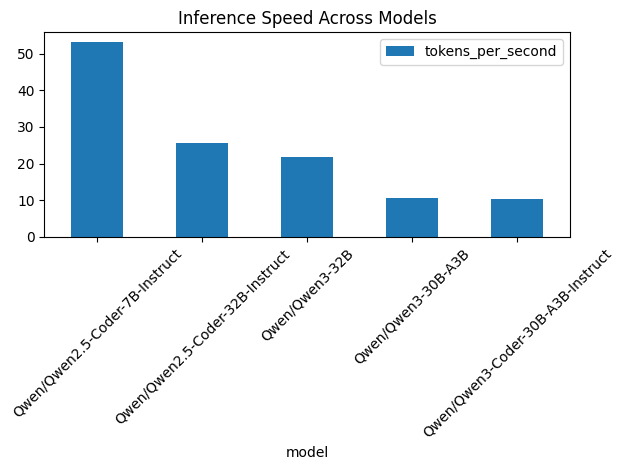

In [1]:
# Load and analyze results
import pandas as pd
import matplotlib.pyplot as plt

# Read benchmark data
df = pd.read_csv("qwen_codegen_outputs-flash/qwen_codegen_summary.csv")

# Plot tokens per second comparison
df.plot(x='model', y='tokens_per_second', kind='bar', 
        title='Inference Speed Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_comparison.png')

# Memory efficiency analysis
df['tokens_per_gb'] = df['output_tokens'] / df['gpu_allocated_gb']
print(df[['model', 'tokens_per_gb']].sort_values('tokens_per_gb', ascending=False))

# Optimized Code for Single H100 NVL

Once the model is benchmarked and functional, production deployment requires pushing inference efficiency to its peak. In this section, we focus on optimizing Qwen2.5-Coder-32B-Instruct for the NVIDIA H100 NVL, leveraging cutting-edge hardware features such as BF16 precision, PyTorch 2.0 compilation, and FlashAttention 2 to dramatically improve speed, memory utilization, and throughput.

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import os

# Set environment variables for H100 optimization
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512,expandable_segments:True"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Clear any existing GPU memory
torch.cuda.empty_cache()

model_name = "Qwen/Qwen2.5-Coder-32B-Instruct"
custom_cache_dir = "/dev/shm"

print(f"Loading {model_name} optimized for single H100 NVL...")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    trust_remote_code=True,
    cache_dir=custom_cache_dir
)

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# H100 Optimized Loading - WORKING VERSION
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,  # BF16 is optimal for H100
    device_map="cuda:0",  # Single GPU
    trust_remote_code=True,
    low_cpu_mem_usage=True,
    cache_dir=custom_cache_dir,
    attn_implementation="flash_attention_2",
    use_cache=True,
    # Memory optimization for single GPU
    max_memory={"cuda:0": "85GB"},  # Leave ~10GB for activations and KV cache
)

# H100 Performance optimizations
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
torch.backends.cuda.matmul.allow_fp16_reduced_precision_reduction = True

print("Compiling model for H100...")
# Enable PyTorch 2.0 compilation for performance
model = torch.compile(model, mode="reduce-overhead")  # More stable than max-autotune

print(f"✅ Model loaded and compiled!")
print(f"📍 Device: {model.device}")
print(f"💾 Model memory: {model.get_memory_footprint() / 1e9:.2f} GB")

# Check GPU utilization
if torch.cuda.is_available():
    gpu_memory = torch.cuda.memory_allocated() / 1e9
    gpu_reserved = torch.cuda.memory_reserved() / 1e9
    gpu_total = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"🔥 GPU Memory - Allocated: {gpu_memory:.2f} GB")
    print(f"🔥 GPU Memory - Reserved: {gpu_reserved:.2f} GB") 
    print(f"🔥 GPU Memory - Total: {gpu_total:.2f} GB")
    print(f"🔥 GPU Memory - Free: {(gpu_total - gpu_reserved):.2f} GB")

# Optimized generation function
def generate_h100_optimized(prompt, max_new_tokens=1024, temperature=0.7):
    """Optimized generation for H100 NVL"""
    inputs = tokenizer(
        prompt, 
        return_tensors="pt", 
        padding=True, 
        truncation=True,
        max_length=4096
    ).to("cuda:0")
    
    with torch.inference_mode():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            temperature=temperature,
            top_p=0.9,
            num_return_sequences=1,
            pad_token_id=tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            early_stopping=True,
            output_attentions=False,
            output_hidden_states=False,
        )
    
    generated_text = tokenizer.decode(
        outputs[0][inputs['input_ids'].shape[1]:], 
        skip_special_tokens=True
    )
    return generated_text



/anaconda/envs/qwen-llm-flash/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Qwen/Qwen2.5-Coder-32B-Instruct optimized for single H100 NVL...


Loading checkpoint shards: 100%|██████████| 14/14 [00:08<00:00,  1.69it/s]


Compiling model for H100...
✅ Model loaded and compiled!
📍 Device: cuda:0
💾 Model memory: 65.53 GB
🔥 GPU Memory - Allocated: 65.53 GB
🔥 GPU Memory - Reserved: 65.54 GB
🔥 GPU Memory - Total: 99.87 GB
🔥 GPU Memory - Free: 34.33 GB


In [2]:
import time

# Basic generation function for comparison
def generate_text(prompt, max_length=2000, temperature=0.7, top_p=0.8):
    """Basic text generation function"""
    
    # Encode input
    inputs = tokenizer(prompt, return_tensors="pt", padding=True).to(model.device)
    
    # Track GPU memory before generation
    memory_before = torch.cuda.memory_allocated() / 1e9
    start_time = time.time()
    
    # Generate response
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id
        )
    
    # Calculate metrics
    generation_time = time.time() - start_time
    memory_after = torch.cuda.memory_allocated() / 1e9
    
    # Decode response
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    new_text = response[len(prompt):].strip()
    
    print(f"\n📊 BASIC GENERATION METRICS:")
    print(f"🕒 GPU Name: {torch.cuda.get_device_properties(0).name}")
    print(f"🧠 Model Name: {model_name}")
    print(f"🕒 Generation time: {generation_time:.2f}s")
    print(f"💾 Memory delta: {memory_after - memory_before:.3f} GB")
    print(f"📝 Generated tokens: {len(outputs[0]) - len(inputs['input_ids'][0])}")
    print(f"⚡ Tokens/second: {(len(outputs[0]) - len(inputs['input_ids'][0])) / generation_time:.1f}")
    
    return new_text

# Enhanced optimized generation function with metrics
def generate_h100_optimized_with_metrics(prompt, max_new_tokens=2000, temperature=0.7):
    """Optimized generation for H100 NVL with performance metrics"""
    inputs = tokenizer(
        prompt, 
        return_tensors="pt", 
        padding=True, 
        truncation=True,
        max_length=4096
    ).to("cuda:0")
    
    # Track GPU memory before generation
    memory_before = torch.cuda.memory_allocated() / 1e9
    start_time = time.time()
    
    with torch.inference_mode():  # More efficient than torch.no_grad()
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            temperature=temperature,
            top_p=0.9,
            num_return_sequences=1,
            pad_token_id=tokenizer.eos_token_id,
            use_cache=True,
            num_beams=1,
            early_stopping=True,
            output_attentions=False,
            output_hidden_states=False,
        )
    
    # Calculate metrics
    generation_time = time.time() - start_time
    memory_after = torch.cuda.memory_allocated() / 1e9
    tokens_generated = len(outputs[0]) - len(inputs['input_ids'][0])
    
    generated_text = tokenizer.decode(
        outputs[0][inputs['input_ids'].shape[1]:], 
        skip_special_tokens=True
    )
    
    print(f"\n📊 OPTIMIZED GENERATION METRICS:")
    print(f"🕒 GPU Name: {torch.cuda.get_device_properties(0).name}")
    print(f"🧠 Model Name: {model_name}")
    print(f"🕒 Generation time: {generation_time:.2f}s")
    print(f"💾 Memory delta: {memory_after - memory_before:.3f} GB")
    print(f"📝 Generated tokens: {tokens_generated}")
    print(f"⚡ Tokens/second: {tokens_generated / generation_time:.1f}")
    
    return generated_text

# Performance comparison function
def compare_generation_methods(prompt, max_tokens=2000):
    """Compare basic vs optimized generation"""
    print("=" * 80)
    print("🔬 GENERATION METHOD COMPARISON")
    print("=" * 80)
    
    # Test basic generation
    print("\n1️⃣ Testing BASIC generation method...")
    torch.cuda.empty_cache()  # Clear cache for fair comparison
    result_basic = generate_text(prompt, max_length=len(tokenizer(prompt)['input_ids']) + max_tokens)
    
    # Test optimized generation
    print("\n2️⃣ Testing OPTIMIZED generation method...")
    torch.cuda.empty_cache()  # Clear cache for fair comparison
    result_optimized = generate_h100_optimized_with_metrics(prompt, max_new_tokens=max_tokens)
    
    print("\n" + "=" * 80)
    print("📊 COMPARISON COMPLETE")
    print("=" * 80)
    
    return result_basic, result_optimized

# Test both methods
print("\n🧪 Testing both generation methods...")
test_prompt = "Explain the benefits of using Kubernetes for machine learning workloads:"

# Run comparison
basic_result, optimized_result = compare_generation_methods(test_prompt, max_tokens=2000)

print(f"\n📄 BASIC Generated text :\n{basic_result}...")
print(f"\n📄 OPTIMIZED Generated text :\n\n\n{optimized_result}...")

print("\n✅ Model comparison complete!")


🧪 Testing both generation methods...
🔬 GENERATION METHOD COMPARISON

1️⃣ Testing BASIC generation method...


The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📊 BASIC GENERATION METRICS:
🕒 GPU Name: NVIDIA H100 NVL
🧠 Model Name: Qwen/Qwen2.5-Coder-32B-Instruct
🕒 Generation time: 48.57s
💾 Memory delta: 0.034 GB
📝 Generated tokens: 1117
⚡ Tokens/second: 23.0

2️⃣ Testing OPTIMIZED generation method...

📊 OPTIMIZED GENERATION METRICS:
🕒 GPU Name: NVIDIA H100 NVL
🧠 Model Name: Qwen/Qwen2.5-Coder-32B-Instruct
🕒 Generation time: 45.96s
💾 Memory delta: 0.000 GB
📝 Generated tokens: 1188
⚡ Tokens/second: 25.9

📊 COMPARISON COMPLETE

📄 BASIC Generated text :
Kubernetes is a powerful container orchestration platform that can be used to manage and scale containerized applications. It provides a wide range of features and capabilities that make it an ideal choice for running machine learning workloads. Some of the key benefits of using Kubernetes for machine learning workloads include:

1. Scalability: Kubernetes can automatically scale up or down the number of containers running a machine learning workload based on demand. This means that you can handl